![scaling](https://user-images.githubusercontent.com/54896849/116708437-55fe3b00-a9ed-11eb-88dc-338c69e96523.PNG)

Feature Scaling usually improves performance of:

* Gradient Descent Based Algorithms (like linear regression, logistic regression, and neural network, etc.)
* Distance-Based Algorithms (like KNN, K-means, and SVM, etc.)

#### Types Of Transformation
1. Standard Scaler (Standardization)
2. Min-Max Scaler (Normalization)
3. Robust Scaler
4. MaxAbs Scaler
5. Guassian Transformation

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stat
import pylab 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read Dataset

In [2]:
df=pd.read_csv('titanic.csv', usecols=['Age','Survived'])
df.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [3]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [4]:
df.isnull().sum()

Survived    0
Age         0
dtype: int64

In [5]:
X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Feature Scaling

## Standardization
* We try to bring all the features to a similar scale. 
* standarisation means centering the feature at zero (mean=0, std=1)
*  X_scaled = (X - X_mean) / X_std

**NOTE:** 
* Standard Scaler assumes that the distribution of the feature is normal. 
* Thus, in case, the features are not normally distributed, we :
    1. either choose a different scaler
    2. or first, convert the features to a normal distribution and then apply this scaler

In [6]:
scaler = StandardScaler()
X_train['Age_standard_scaler']= scaler.fit_transform(X_train[['Age']])

## Normalization
* Normalization (or Min-Max Scaling) scales the values between 0 to 1.
* X_scaled = (X - X_min / (X_max - X_min)

In [7]:
scaler = MinMaxScaler()
X_train['Age_min_max_scaler']= scaler.fit_transform(X_train[['Age']])

## Robust Scaler
* It is used to scale the feature to median and quantiles.
* The interquantile difference is the difference between the 75th and 25th quantile. <br>
IQR = 75th quantile - 25th quantile
* Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. <br>
X_scaled = (X - X_median) / IQR

In [8]:
scaler = RobustScaler()
X_train['Age_robust_scaler'] = scaler.fit_transform(X_train[['Age']])

## MaxAbs Scaler
* Scales the values between -1 to 1.
* X_scaled = X / |X_max|

In [ ]:
scaler = MaxAbsScaler()
X_train['Age_max_abs'] = scaler.fit_transform(X_train[['Age']])

## Guassian Transformation

* Some ML algorithms like linear and logistic regression assume that the features are normally distributed.
* Gaussian transformation methods are used to transform the data into gaussian distribution.
* Methods:
   1. Logarithmic transformation
   2. Square root transformation
   3. Reciprocal transformation
   4. Exponential transformation
   5. Box-Cox transformation
   6. Yeo-Johnson transformation

In [9]:
# Check whether feature follows normal distribution
# Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

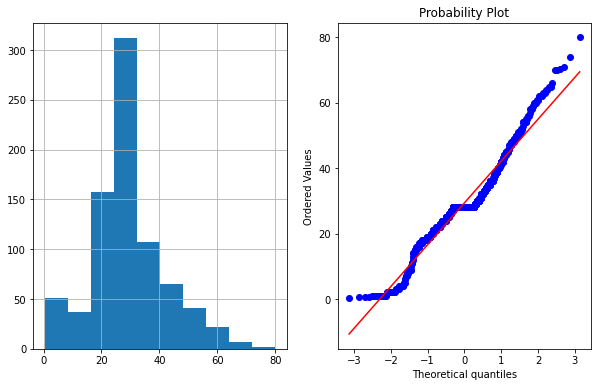

In [10]:
# We can see that Age column is a bit right skewed
plot_data(X_train,'Age')

### Logarithmic transformation
* X_scaled = ln(X)

**NOTE:**
This  transformation is defined only for strictly positive numbers.

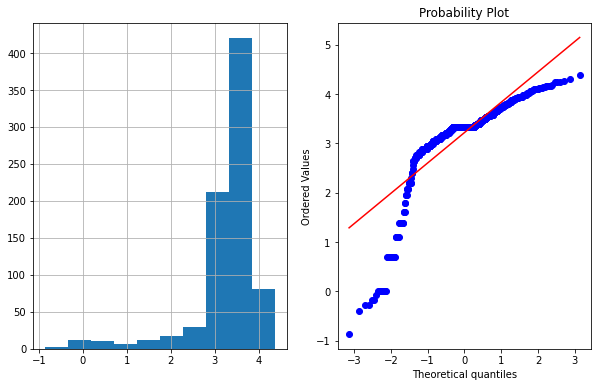

In [11]:
# We can see that Logarithmic transformation doesn't transform Age into gaussian distribution.
scaler = FunctionTransformer(np.log, validate=True)
X_train['Age_log']=scaler.fit_transform(X_train[['Age']])
plot_data(X_train,'Age_log')

### Reciprocal transformation
* X_scaled = 1/X

**NOTE:**
This  transformation is not defined for 0 values.

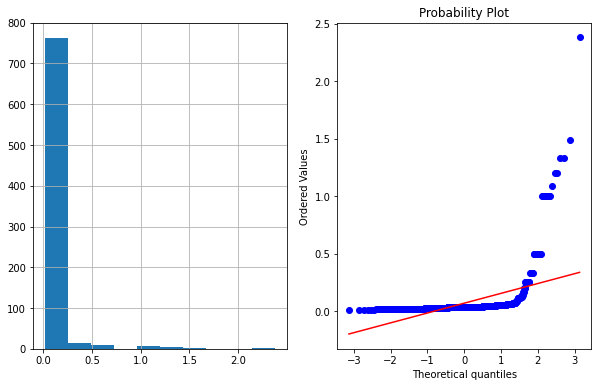

In [12]:
# We can see that Reciprocal transformation doesn't transform Age into gaussian distribution.
scaler = FunctionTransformer(np.reciprocal, validate=True)
X_train['Age_reciprocal']=scaler.fit_transform(X_train[['Age']])
plot_data(X_train,'Age_reciprocal')

### Square Root transformation
* X_scaled = X^(0.5)

**NOTE:**
This  transformation is defined only for positive numbers.

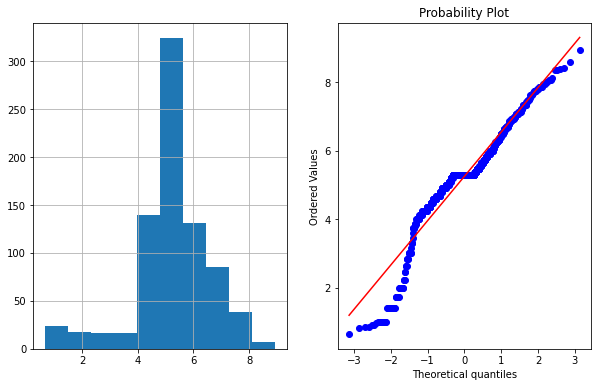

In [13]:
# We can see that Square Root transformation doesn't transform Age into gaussian distribution.
scaler = FunctionTransformer(np.sqrt, validate=True)
X_train['Age_sqrt']=scaler.fit_transform(X_train[['Age']])
plot_data(X_train,'Age_sqrt')

### Exponential transformation
* X_scaled = X^(number)

**NOTE:**
Any exponent can be used in this transformation.

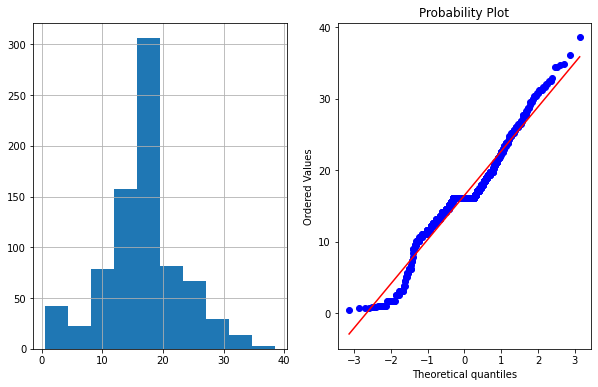

In [14]:
# We can see that Exponential transformation almost transforms Age into gaussian distribution.
scaler = FunctionTransformer(lambda x: x**(1/1.2), validate=True)
X_train['Age_exponential']=scaler.fit_transform(X_train[['Age']])
plot_data(X_train,'Age_exponential')

### Box-Cox transformation
* Box-Cox is one of the most successful transformations.
* It’s an evolution of the exponential transformation, which looks through various exponents instead of trying them manually.
* By doing Box-Cox transformation, we’re searching and evaluating all the other transformations and choosing the best one.
* The exponent here is a variable called lambda (λ) that varies over the range of -5 to 5, and in the process of searching, we examine all values of λ.
* Finally, we choose the optimal value (resulting in the best approximation to a normal distribution) for your variable.
* 
```
X_scaled = (X^(λ) − 1) / λ  if λ !=0 
             ln(X)            if λ =0
```

**NOTE:**
This  transformation is defined only for positive numbers.

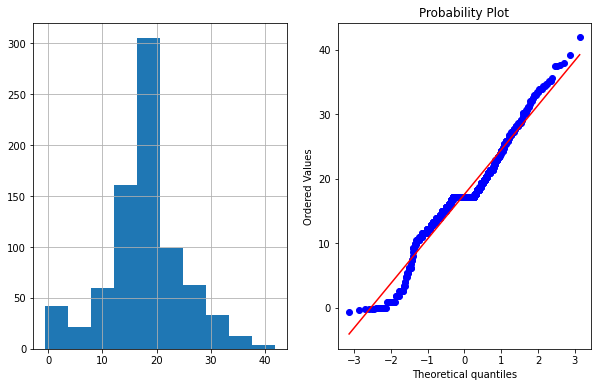

In [15]:
# We can see that Box-Cox transformation almost transforms Age into gaussian distribution.
scaler = PowerTransformer(method='box-cox', standardize=False)
X_train['Age_boxcox']=scaler.fit_transform(X_train[['Age']])
plot_data(X_train,'Age_boxcox')

### Yeo-Johnson transformation
* This transformation is somewhat of an adjustment to the Box-Cox transformation.

```
X_scaled = [(X+1)^(λ) − 1] / λ            if λ !=0 and X>=0
           ln(X) +1                       if λ =0 and X>=0
           -[(-X+1)^(2-λ) - 1] / (2-λ)    if λ !=2 and X<0
           -ln(-X+1)                      if λ =2 and X<0
```

**NOTE:**
This transformation also works on negative numbers.

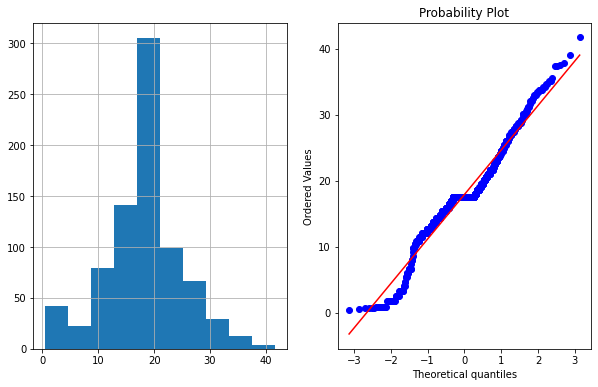

In [16]:
# We can see that Yeo-Johnson transformation almost transforms Age into gaussian distribution.
scaler = PowerTransformer(method='yeo-johnson', standardize=False)
X_train['Age_yeoj']=scaler.fit_transform(X_train[['Age']])
plot_data(X_train,'Age_yeoj')

In [17]:
X_train.head()

,Age,Age_standard_scaler,Age_min_max_scaler,Age_robust_scaler,Age_log,Age_reciprocal,Age_sqrt,Age_exponential,Age_boxcox,Age_yeoj
165,9.0,-1.562035,0.107816,-1.461538,2.197225,0.111111,3.000000,6.240251,6.094624,6.704948
541,9.0,-1.562035,0.107816,-1.461538,2.197225,0.111111,3.000000,6.240251,6.094624,6.704948
625,61.0,2.420289,0.761247,2.538462,4.110874,0.016393,7.810250,30.745026,33.370548,33.386372
388,28.0,-0.106955,0.346569,0.000000,3.332205,0.035714,5.291503,16.068119,17.166335,17.516762
76,28.0,-0.106955,0.346569,0.000000,3.332205,0.035714,5.291503,16.068119,17.166335,17.516762


In [18]:
# scaler.transform(X_test[['Age']])

# References

* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/
* https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-transforming-variables-acea03472e24